In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
filenames = glob.glob('*.csv')
filenames

['cb-2014-08.csv', 'cb-2015-08.csv', 'cb-2016-08.csv', 'cb-2017-08.csv']

In [3]:
# Loop through file names and read the data
dfs = []
for file in filenames:
    print('Reading ' + file)
    dfs.append(pd.read_csv(file))

Reading cb-2014-08.csv
Reading cb-2015-08.csv
Reading cb-2016-08.csv
Reading cb-2017-08.csv


In [25]:
dfs[2].head() # Check 

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,288,2016-08-01 00:01:00,2016-08-01 00:06:00,302,Avenue D & E 3 St,40.720828,-73.977932,428,E 3 St & 1 Ave,40.724677,-73.987834,16920,Subscriber,1961.0,1
1,457,2016-08-01 00:01:00,2016-08-01 00:09:00,285,Broadway & E 14 St,40.734546,-73.990741,432,E 7 St & Avenue A,40.726218,-73.983799,20084,Subscriber,1989.0,2
2,278,2016-08-01 00:02:00,2016-08-01 00:06:00,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3096,Union Ave & N 12 St,40.719240,-73.952420,18380,Subscriber,1971.0,1
3,862,2016-08-01 00:02:00,2016-08-01 00:16:00,280,E 10 St & 5 Ave,40.733320,-73.995101,280,E 10 St & 5 Ave,40.733320,-73.995101,24101,Subscriber,1995.0,1
4,407,2016-08-01 00:02:00,2016-08-01 00:09:00,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,428,E 3 St & 1 Ave,40.724677,-73.987834,18949,Subscriber,1993.0,1


In [5]:
for i in range(4):
    print('Converting set ', i+1)
    dfs[i]['starttime'] = pd.to_datetime(dfs[i]['starttime'])
    dfs[i]['stoptime'] = pd.to_datetime(dfs[i]['stoptime'])

Converting set  1
Converting set  2
Converting set  3
Converting set  4


In [80]:
df = pd.concat(dfs)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5007606 entries, 0 to 1816497
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 object
gender                     int64
dtypes: datetime64[ns](2), float64(4), int64(5), object(4)
memory usage: 611.3+ MB


In [82]:
df.tripduration = round(df.tripduration/60, 2) #from secs to min

In [83]:
df['opyear'] = df.starttime.dt.year

In [84]:
df.isnull().sum()
# conclonly birth year shows missing values, this is good

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 596331
gender                          0
opyear                          0
dtype: int64

In [63]:
df['birth year'].unique()

array(['1969', '1991', '1984', '1988', '1981', '1958', '\\N', '1980',
       '1986', '1985', '1957', '1974', '1978', '1983', '1989', '1972',
       '1977', '1964', '1982', '1987', '1967', '1971', '1960', '1995',
       '1990', '1961', '1976', '1963', '1954', '1973', '1955', '1996',
       '1975', '1970', '1979', '1993', '1952', '1966', '1992', '1998',
       '1965', '1962', '1968', '1956', '1959', '1949', '1953', '1997',
       '1994', '1945', '1950', '1951', '1948', '1947', '1946', '1940',
       '1941', '1943', '1933', '1942', '1936', '1900', '1934', '1901',
       '1944', '1937', '1938', '1935', '1939', '1926', '1899', '1932',
       '1910', '1931', '1917', '1924', '1907', '1930', '1921', 1987.0,
       1951.0, 1985.0, 1975.0, 1978.0, 1988.0, 1976.0, nan, 1989.0, 1963.0,
       1953.0, 1990.0, 1981.0, 1965.0, 1959.0, 1984.0, 1991.0, 1969.0,
       1968.0, 1983.0, 1970.0, 1971.0, 1997.0, 1964.0, 1982.0, 1992.0,
       1994.0, 1952.0, 1979.0, 1973.0, 1956.0, 1993.0, 1986.0, 1961.0,
  

In [85]:
df['birth year'].isnull().sum(), df[df['birth year']=='\\N']['birth year'].count()

(596331, 135932)

In [89]:
df['birth year'] = df['birth year'].fillna('').replace('\\N','')

In [96]:
dfk = df[df['birth year'] != ''] # known values
dfn = df[df['birth year'] == ''] # unknown values
dfk.shape, dfn.shape

((4275343, 16), (732263, 16))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


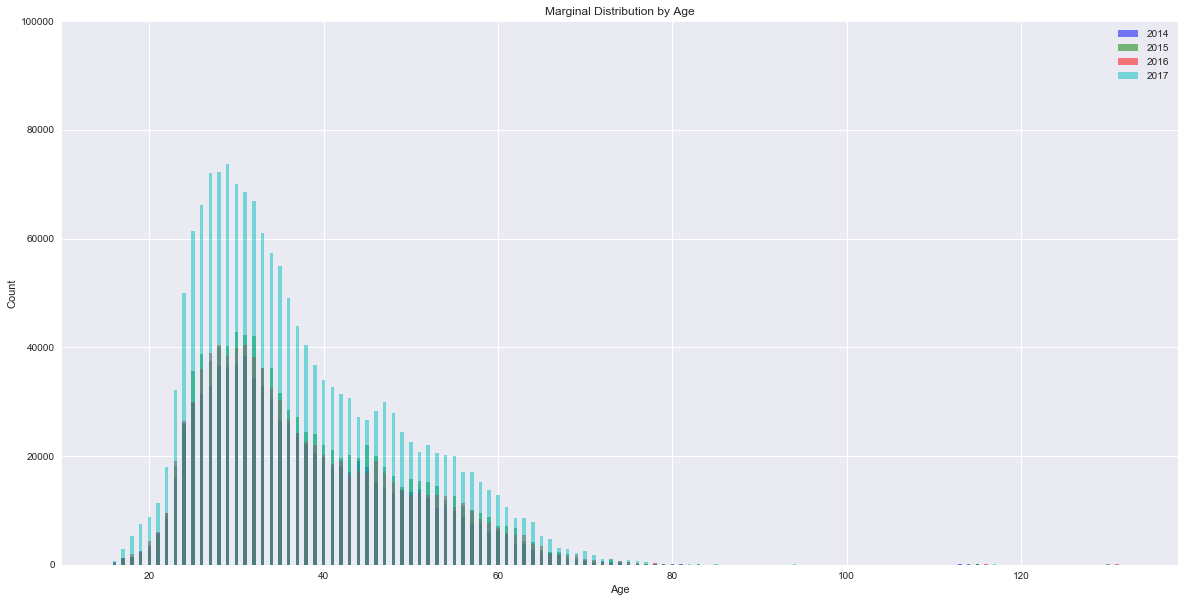

In [166]:
# Marginal Distribution by Age
from cycler import cycler

dfk['age'] = dfk['opyear'].astype(int) - dfk['birth year'].astype(int)

plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

plt.figure(figsize=(20,10))
plt.ylim([0,100000])

for year in dfk['opyear'].unique():
    hist_age = np.unique(dfk[dfk['opyear']==year]['age'], return_counts=True)
    plt.bar(hist_age[0], hist_age[1], align='center', width=0.4, alpha=0.5, label=year)
    
plt.legend()
plt.title('Marginal Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')

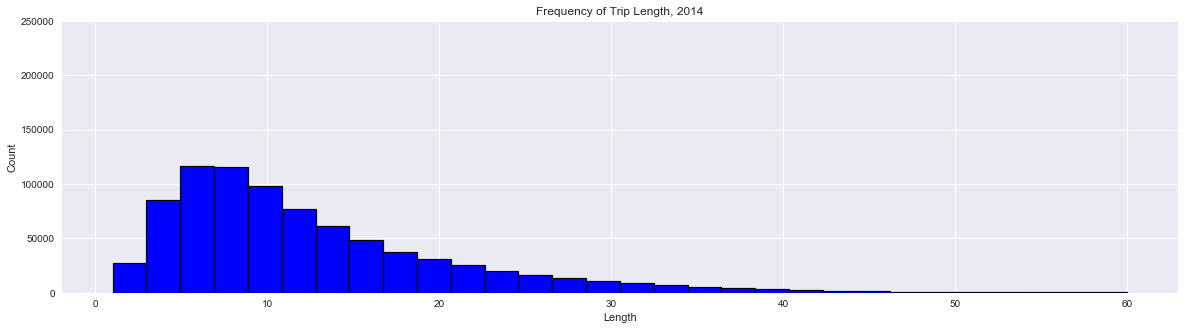

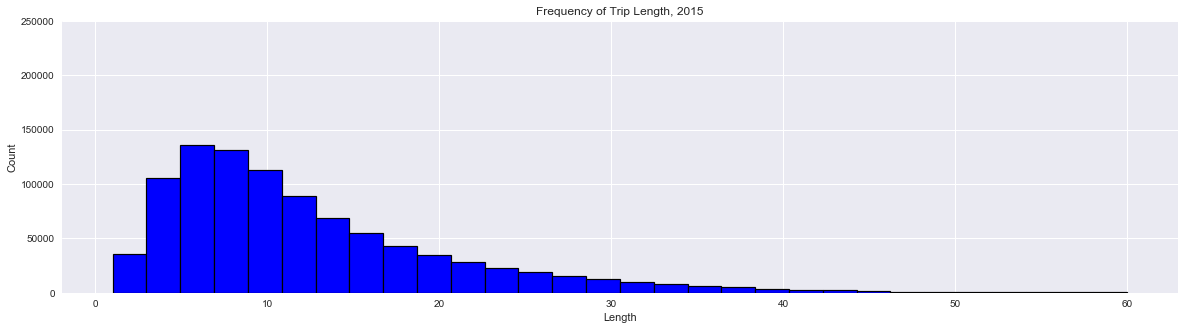

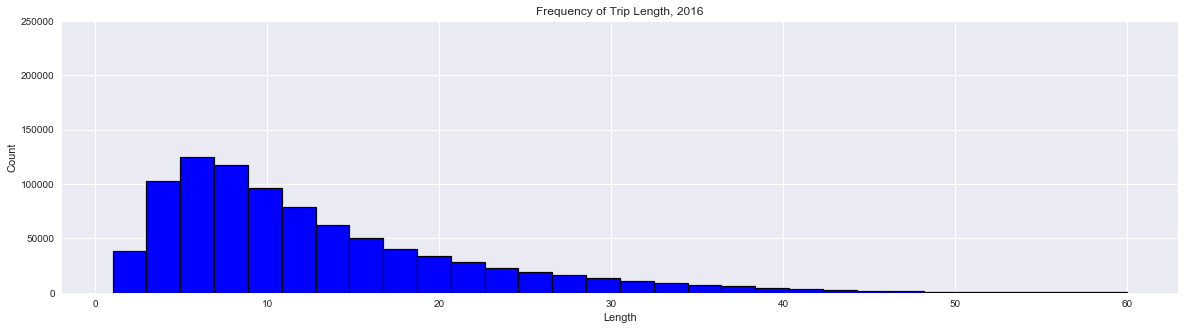

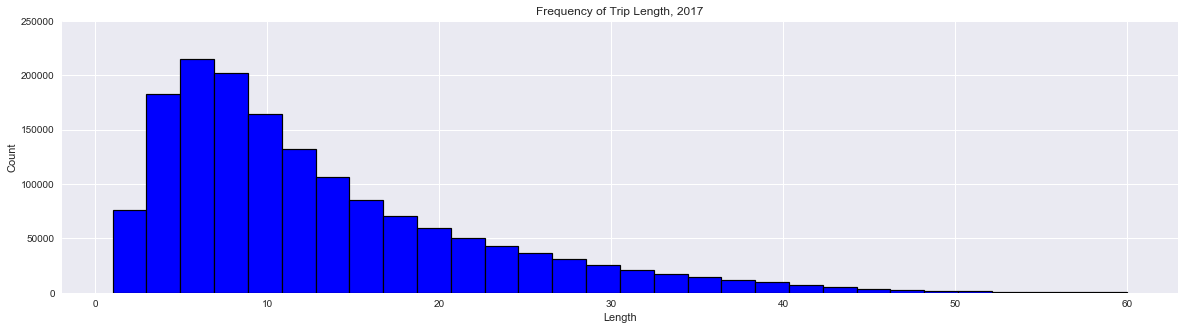

In [161]:
# Frequency by Length, Year
for year in dfk['opyear'].unique():
    a = dfk[dfk.opyear == year]
    b = a.loc[(a.tripduration <= 60)][['tripduration']]
    b.hist(bins=30, histtype='bar', edgecolor='black', linewidth=1.2, align='mid', figsize=(20,5))
    plt.ylim([0,250000])
    plt.title('Frequency of Trip Length, %i' %year)    
    plt.xlabel('Length')
    plt.ylabel('Count')

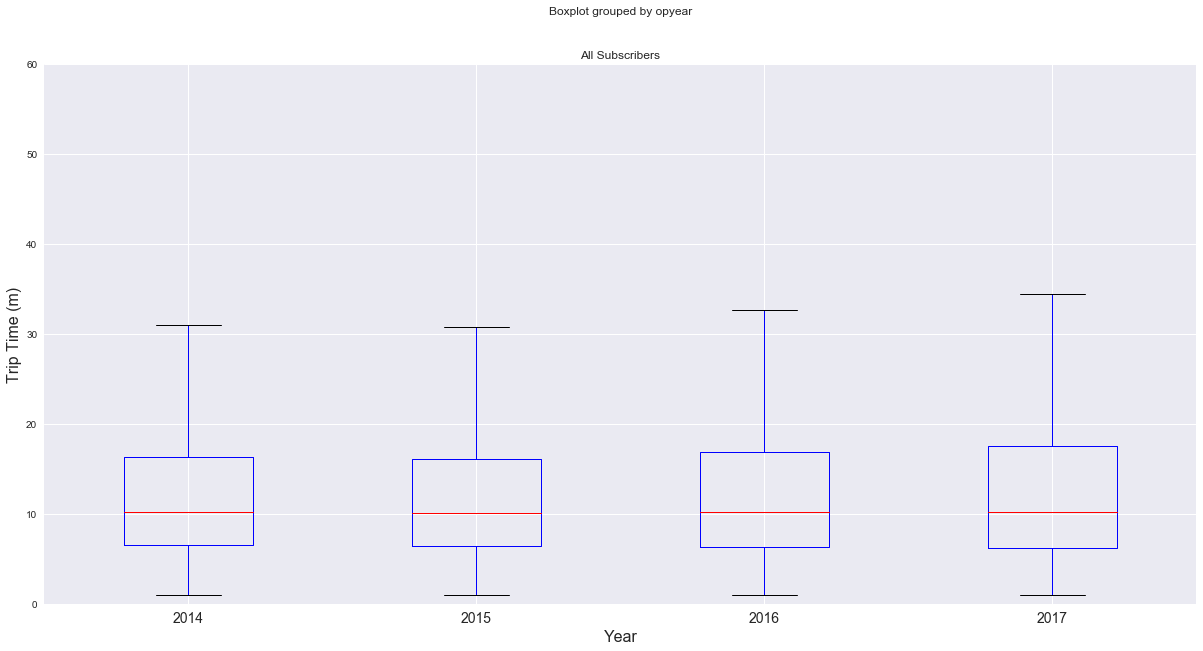

In [218]:
# Box plot of trip duration
bp = dfk.boxplot(column='tripduration', by='opyear', grid=True, figsize=(20,10))
ax = plt.gca()

ax.set_title('All Subscribers')
ax.set_xlabel('Year', fontsize=16)
ax.set_xticklabels(['2014', '2015', '2016', '2017'], fontsize=14)
ax.set_ylabel('Trip Time (m)', fontsize=16)
ax.set_ylim([0,60]) # less than 1 hr

plt.show()

This will explore several subgroups.  

* Subscribers vs customers
* Men vs women (since overall distribution is predominantly male, female will be produced)
* Younger generation (born since 1990)

This will follow the previous two trends.

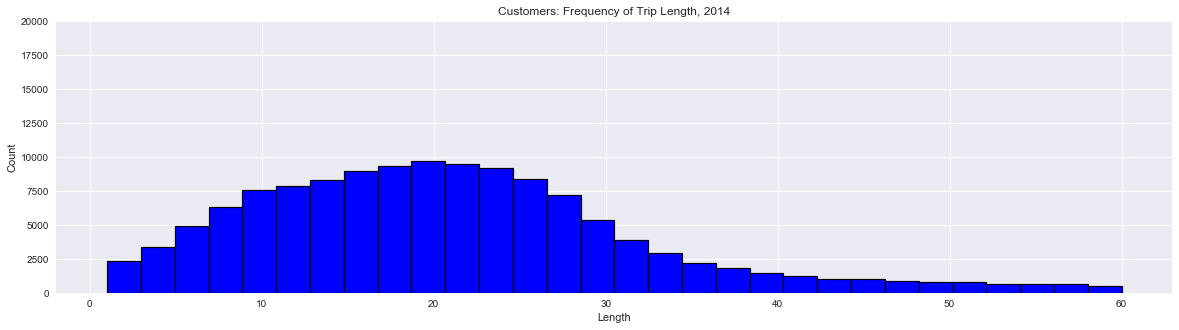

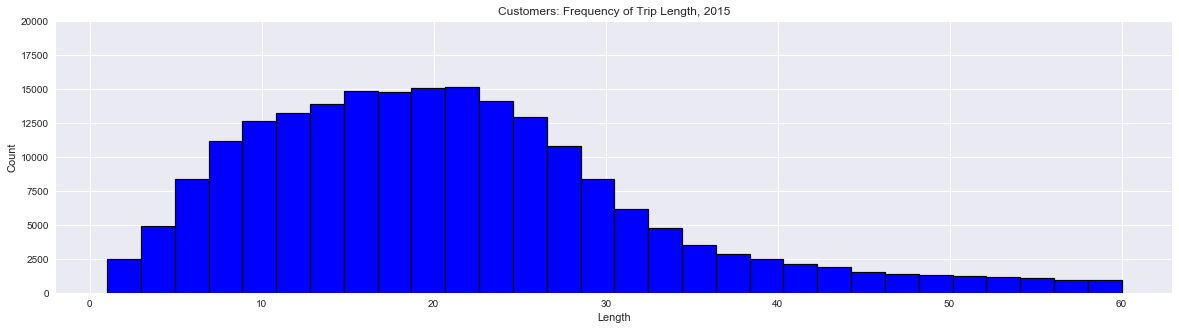

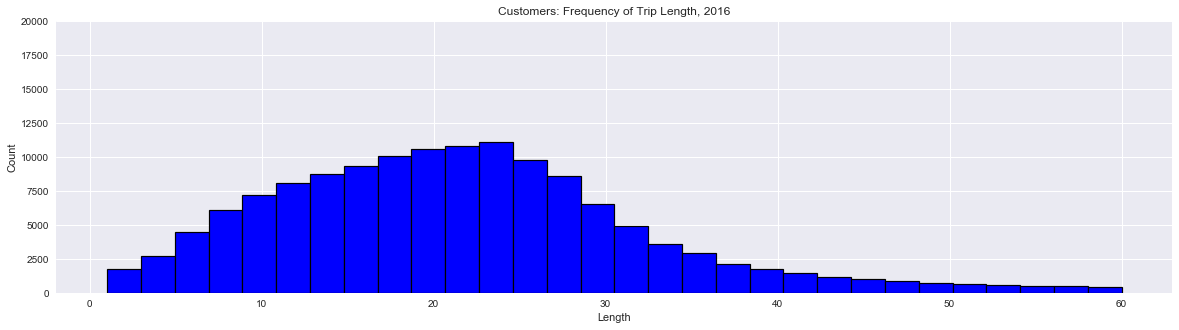

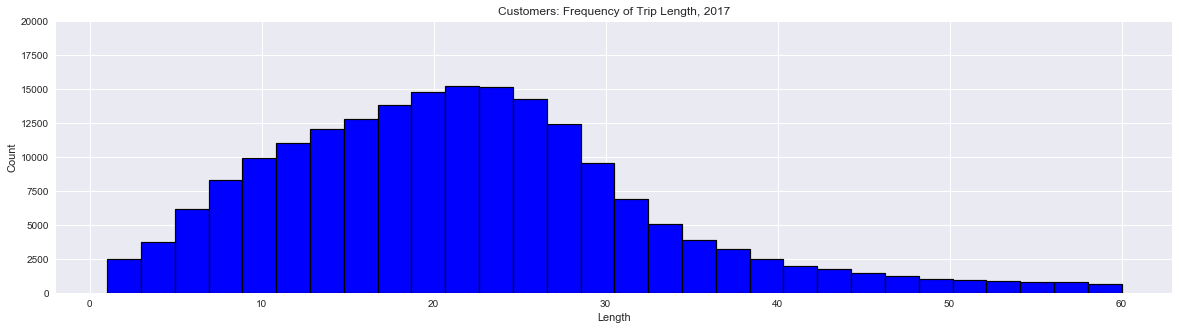

In [203]:
# Unknown Values, Frequency by Length, Year
for year in dfn['opyear'].unique():
    a = dfn[(dfn.opyear == year) & (dfn.usertype=='Customer')]
    b = a.loc[(a.tripduration <= 60)][['tripduration']]
    b.hist(bins=30, histtype='bar', edgecolor='black', linewidth=1.2, align='mid', figsize=(20,5))
    plt.ylim([0,20000])
    plt.title('Customers: Frequency of Trip Length, %i' %year)
    plt.xlabel('Length')
    plt.ylabel('Count')

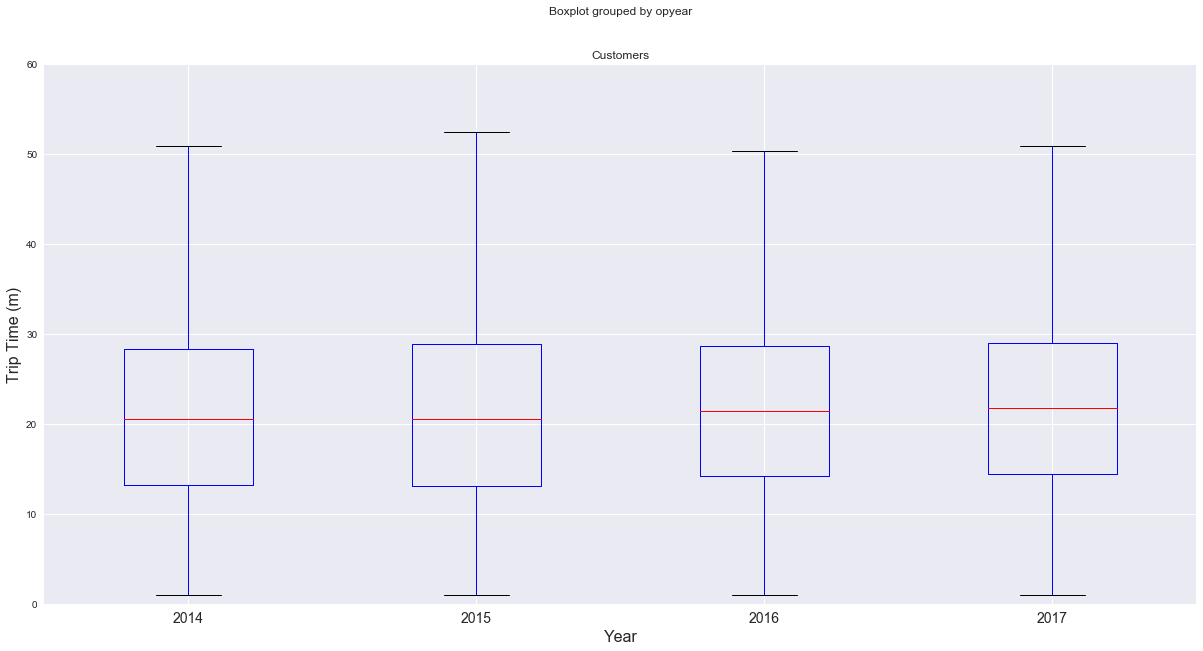

In [202]:
# Box plot of trip duration
bp = dfn[dfn.usertype=='Customer'].boxplot(column='tripduration', by='opyear', grid=True, figsize=(20,10))
ax = plt.gca()

ax.set_title('Customers')
ax.set_xlabel('Year', fontsize=16)
ax.set_xticklabels(['2014', '2015', '2016', '2017'], fontsize=14)
ax.set_ylabel('Trip Time (m)', fontsize=16)
ax.set_ylim([0,60]) # less than 1 hr

plt.show()

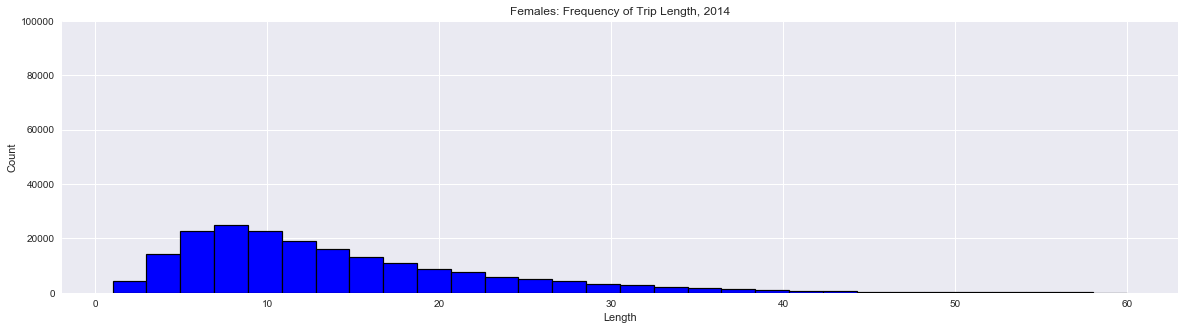

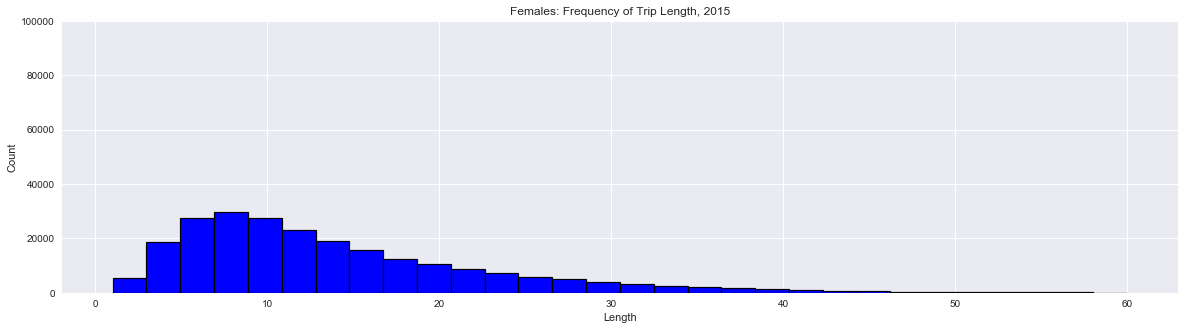

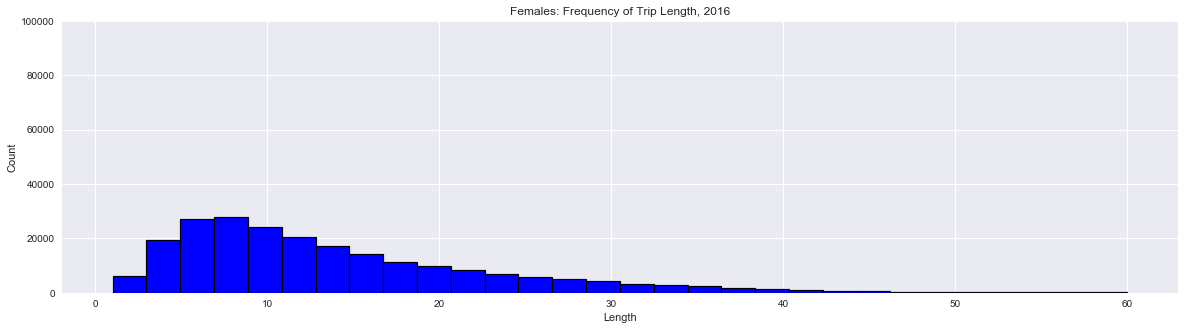

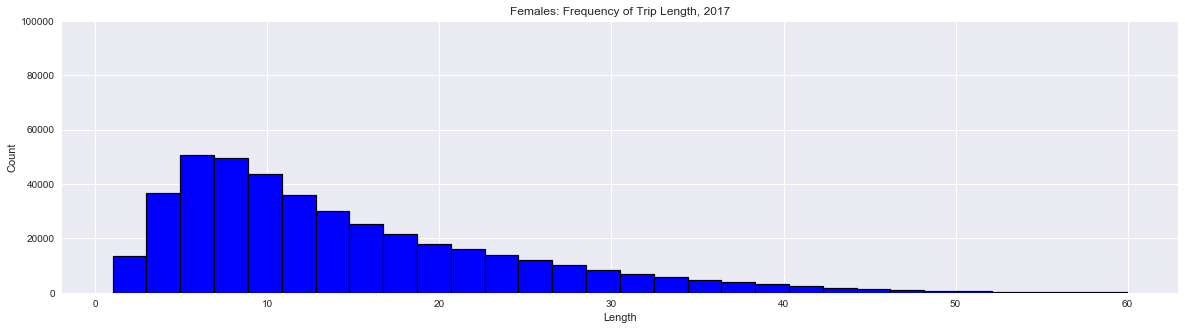

In [216]:
# Females, Frequency by Length, Year
for year in dfk['opyear'].unique():
    a = dfk[(dfk.opyear == year) & (dfk.gender==2)]
    b = a.loc[(a.tripduration <= 60)][['tripduration']]
    b.hist(bins=30, histtype='bar', edgecolor='black', linewidth=1.2, align='mid', figsize=(20,5))
    plt.ylim([0,100000])
    plt.title('Females: Frequency of Trip Length, %i' %year)
    plt.xlabel('Length')
    plt.ylabel('Count')

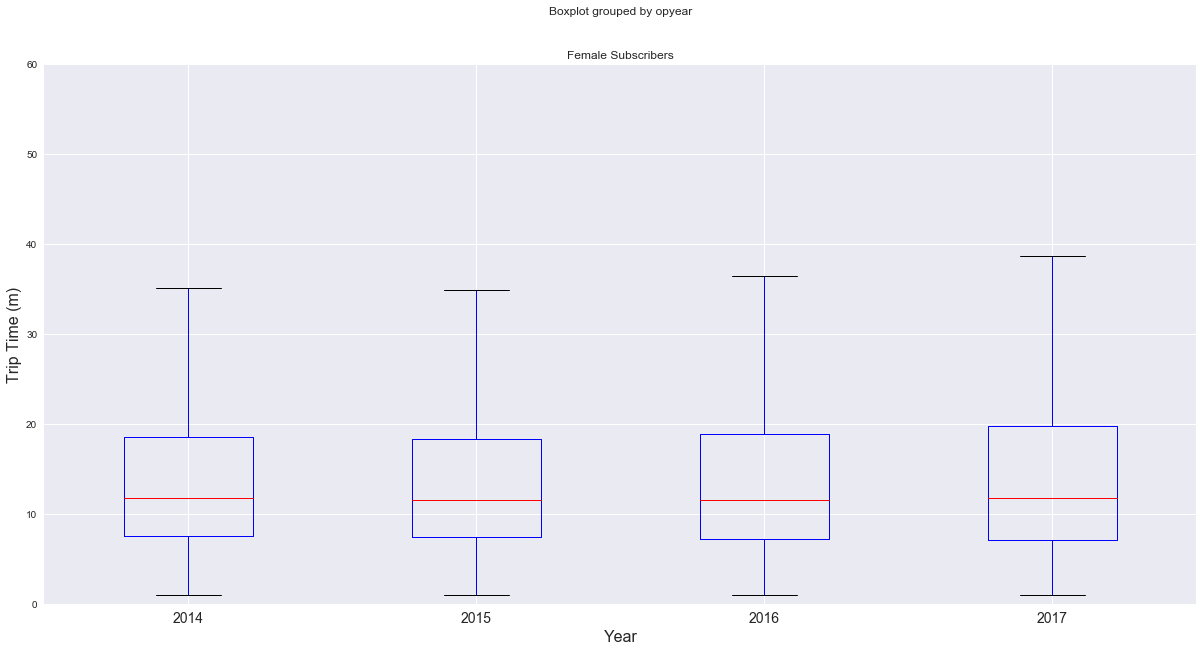

In [217]:
# Box plot of trip duration
bp = dfk[dfk.gender==2].boxplot(column='tripduration', by='opyear', grid=True, figsize=(20,10))
ax = plt.gca()

ax.set_title('Female Subscribers')
ax.set_xlabel('Year', fontsize=16)
ax.set_xticklabels(['2014', '2015', '2016', '2017'], fontsize=14)
ax.set_ylabel('Trip Time (m)', fontsize=16)
ax.set_ylim([0,60]) # less than 1 hr

plt.show()

In [212]:
dfy = dfk[dfk['birth year'].astype(int) >= 1990] # younger generation

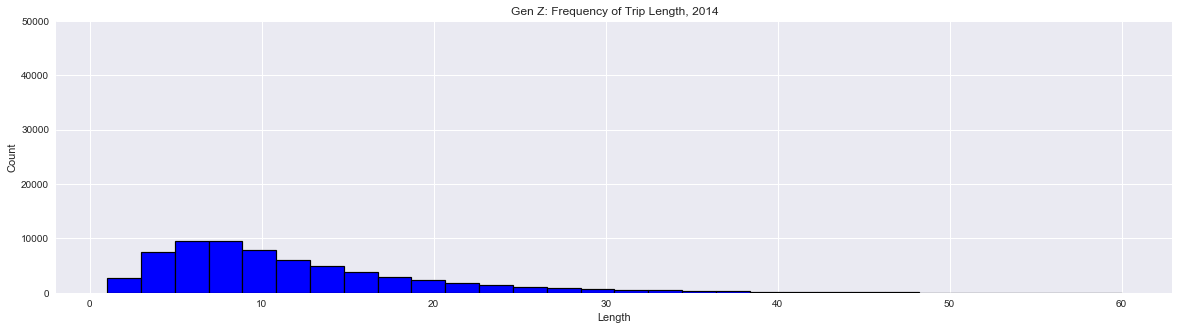

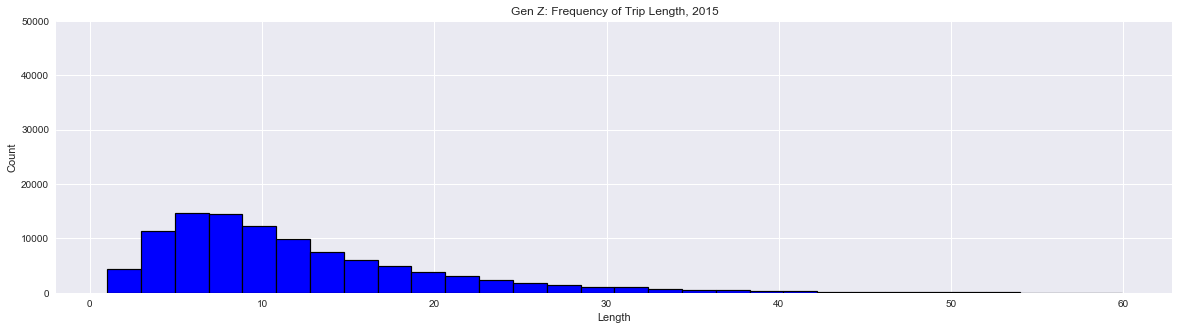

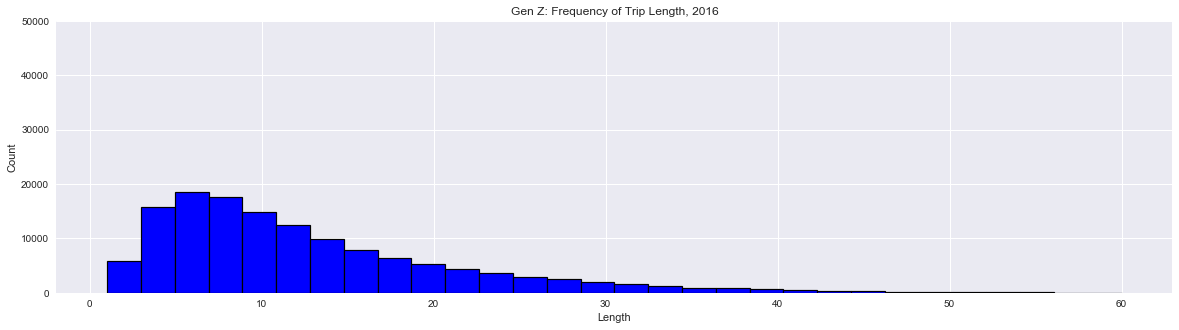

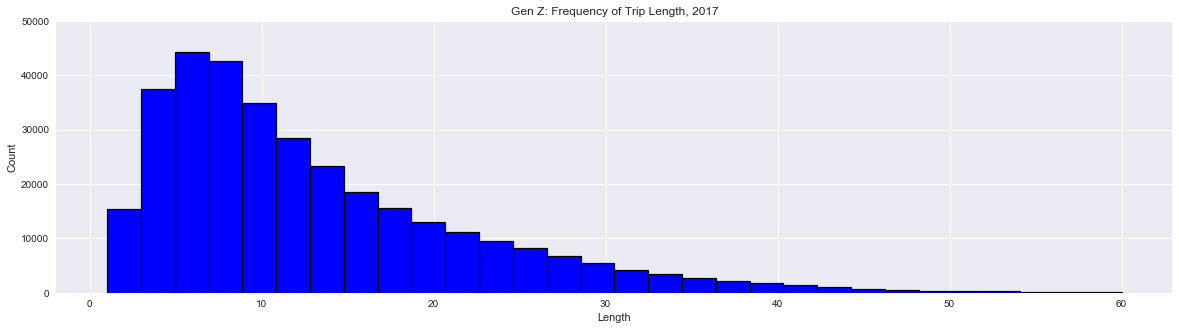

In [215]:
# Younger Generation, Frequency by Length, Year
for year in dfy['opyear'].unique():
    a = dfy[(dfy.opyear == year)]
    b = a.loc[(a.tripduration <= 60)][['tripduration']]
    b.hist(bins=30, histtype='bar', edgecolor='black', linewidth=1.2, align='mid', figsize=(20,5))
    plt.ylim([0,50000])
    plt.title('Gen Z: Frequency of Trip Length, %i' %year)
    plt.xlabel('Length')
    plt.ylabel('Count')

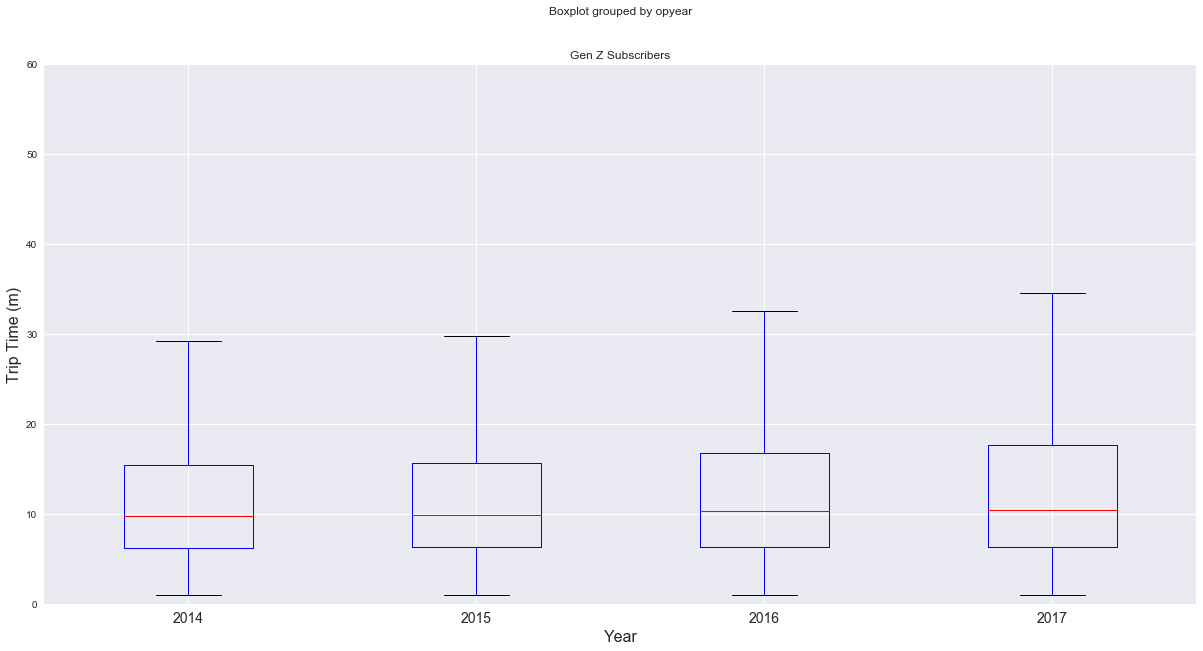

In [219]:
# Box plot of trip duration
bp = dfy.boxplot(column='tripduration', by='opyear', grid=True, figsize=(20,10))
ax = plt.gca()

ax.set_title('Gen Z Subscribers')
ax.set_xlabel('Year', fontsize=16)
ax.set_xticklabels(['2014', '2015', '2016', '2017'], fontsize=14)
ax.set_ylabel('Trip Time (m)', fontsize=16)
ax.set_ylim([0,60]) # less than 1 hr

plt.show()

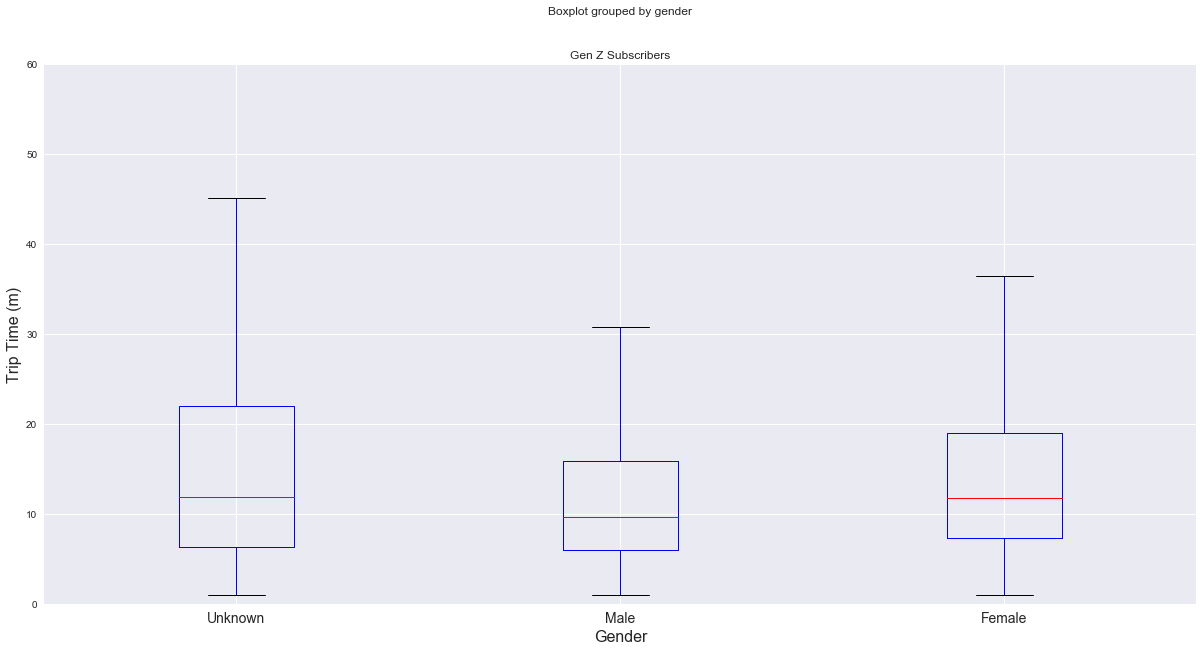

In [228]:
# Box plot of trip duration
bp = dfy.boxplot(column='tripduration', by='gender', grid=True, figsize=(20,10))
ax = plt.gca()

ax.set_title('Gen Z Subscribers')
ax.set_xlabel('Gender', fontsize=16)
ax.set_xticklabels(['Unknown', 'Male', 'Female'], fontsize=14)
ax.set_ylabel('Trip Time (m)', fontsize=16)
ax.set_ylim([0,60]) # less than 1 hr

plt.show()

Best to focus more on Generation Z and whether the increase of their trips may cause a need to focus on tailoring to them more.  This is focusing on trip duration, gender activity, and whether the trip length is increasing per year.  

The hypothesis test is:

$H_0: \bar{x}_{2017} = \bar{x}_{2016} = \bar{x}_{2015} = \bar{x}_{2014}$

$H_a: \bar{x}_{2017} \neq \bar{x}_{2016} \neq \bar{x}_{2015} \neq \bar{x}_{2014}$

$\bar{x}$ is the mean of the sample for this generation per year.  So $\bar{x}_2017$ is the mean trip duration for generation Z in 2017.  To ensure that the years are producing a recurring theme, assume that the mean will remain the same as the years progress (unlikely but possible).  To reject the null hypothesis means that there is an increase or a decrease.  

However, first, let's create an ECDF for each year and see how they differ from one another.

In [229]:
# FUNCTIONS
# define the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Bootstrap replication, one-dimensional
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Bootstrap replication by function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Difference of Means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Permutation replications
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

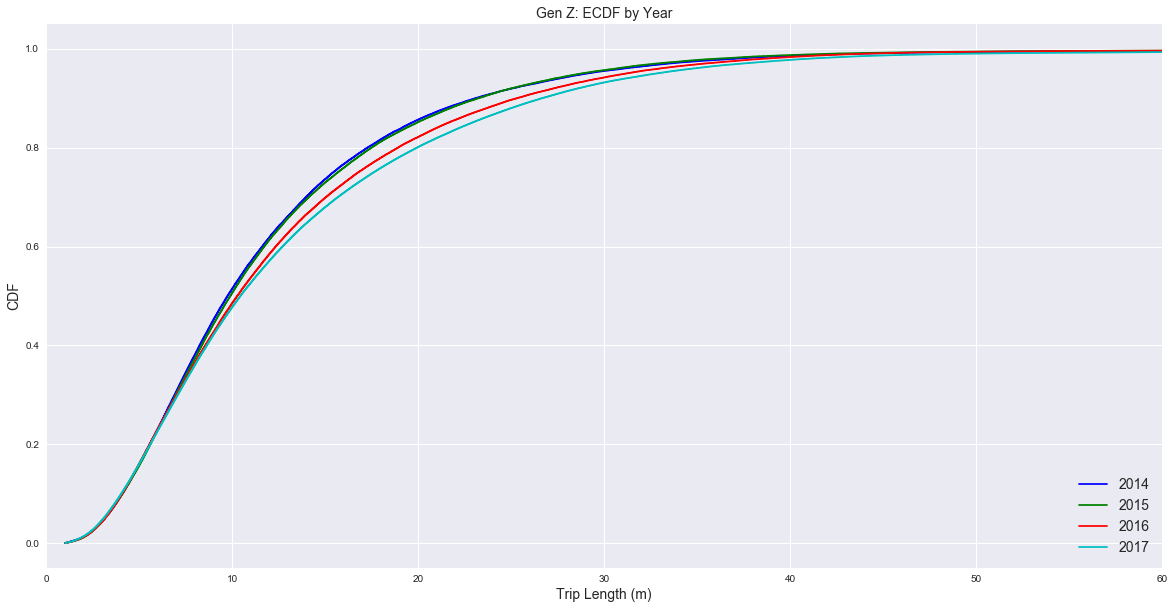

In [235]:
plt.figure(figsize=(20,10))

for year in dfy.opyear.unique():
    x_t, y_t = ecdf(dfy[dfy.opyear == year].tripduration)
    plt.plot(x_t, y_t, label=year)

_ = plt.title('Gen Z: ECDF by Year', fontsize=14)
_ = plt.xlim(0,60)
_ = plt.xlabel('Trip Length (m)', fontsize=14)
_ = plt.ylabel('CDF', fontsize=14)
_ = plt.legend(loc="lower right", labels=dfy.opyear.unique(), fontsize=14)

plt.show()

The best hypothesis is to see whether the trip duration is decreasing from 2014 to 2017, or to see if the trip count is increasing.  The ECDF is showing a rightward shift (at 60% of trips happened within 12 minutes in 2014 while within 13 or 14 minutes in 2017).  